<center><h1>Jain_Anisha_HW8</h1></center>

--Used 2 late days, 3 remaining

Name: Anisha Jain
<br>
Github Username: anisha2k
<br>
USC ID: 1333150117

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.cluster import SpectralClustering
from sklearn.semi_supervised import LabelPropagation
from scipy.spatial.distance import cdist
from scipy.special import softmax
from scipy.spatial import cKDTree
from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, f1_score,  roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
import random
import warnings
warnings.filterwarnings("ignore")

/var/folders/_w/szs1156j739d_x18k5g_2qn80000gn/T/ipykernel_50364/4170544841.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
column_names = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]

df = pd.read_csv('../data/wdbc.data', header=None, names=column_names)

print(df.head())

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   Feature_24  Feature_25  Feature_26  Featu

In [3]:
new_column_names = ['id', 'class'] + [f'column_{i}' for i in range(1, 31)]
df.columns = new_column_names

print(df)
df['class'] = df['class'].replace({'M': 1, 'B': 0})
data_array = df.to_numpy()

print(data_array.shape)

           id class  column_1  column_2  column_3  column_4  column_5  \
0      842302     M     17.99     10.38    122.80    1001.0   0.11840   
1      842517     M     20.57     17.77    132.90    1326.0   0.08474   
2    84300903     M     19.69     21.25    130.00    1203.0   0.10960   
3    84348301     M     11.42     20.38     77.58     386.1   0.14250   
4    84358402     M     20.29     14.34    135.10    1297.0   0.10030   
..        ...   ...       ...       ...       ...       ...       ...   
564    926424     M     21.56     22.39    142.00    1479.0   0.11100   
565    926682     M     20.13     28.25    131.20    1261.0   0.09780   
566    926954     M     16.60     28.08    108.30     858.1   0.08455   
567    927241     M     20.60     29.33    140.10    1265.0   0.11780   
568     92751     B      7.76     24.54     47.92     181.0   0.05263   

     column_6  column_7  column_8  ...  column_21  column_22  column_23  \
0     0.27760   0.30010   0.14710  ...     25.38

### (b) Monte-Carlo Simulation

In [4]:
X = df.drop(['id', 'class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [5]:
X_train

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [6]:
X_test

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.69910,0.21050,0.3126,0.07849
375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.21140,0.12510,0.3153,0.08960
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390,...,16.33,30.86,109.50,826.4,0.1431,0.3026,0.31940,0.15650,0.2718,0.09353
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740


#### (i) Supervised Learning

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
model = LinearSVC(penalty='l1', dual=False, max_iter=5000)
param_grid = {'C': np.logspace(-3, 3, 10)}
cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Iteration 1/30 
Train Accuracy: 0.993 | Test Accuracy: 0.965
Iteration 2/30 
Train Accuracy: 0.987 | Test Accuracy: 0.982
Iteration 3/30 
Train Accuracy: 0.982 | Test Accuracy: 0.947
Iteration 4/30 
Train Accuracy: 0.985 | Test Accuracy: 0.991
Iteration 5/30 
Train Accuracy: 0.991 | Test Accuracy: 0.930
Iteration 6/30 
Train Accuracy: 0.976 | Test Accuracy: 0.947
Iteration 7/30 
Train Accuracy: 0.987 | Test Accuracy: 0.974
Iteration 8/30 
Train Accuracy: 0.980 | Test Accuracy: 0.930
Iteration 9/30 
Train Accuracy: 0.974 | Test Accuracy: 0.974
Iteration 10/30 
Train Accuracy: 0.991 | Test Accuracy: 0.947
Iteration 11/30 
Train Accuracy: 0.980 | Test Accuracy: 0.965
Iteration 12/30 
Train Accuracy: 0.987 | Test Accuracy: 0.956
Iteration 13/30 
Train Accuracy: 0.987 | Test Accuracy: 0.965
Iteration 14/30 
Train Accuracy: 0.980 | Test Accuracy: 0.965
Iteration 15/30 
Train Accuracy: 0.978 | Test Accuracy: 0.956
Iteration 16/30 
Train Accuracy: 0.989 | Test Accuracy: 0.974
Iteration 17/30 


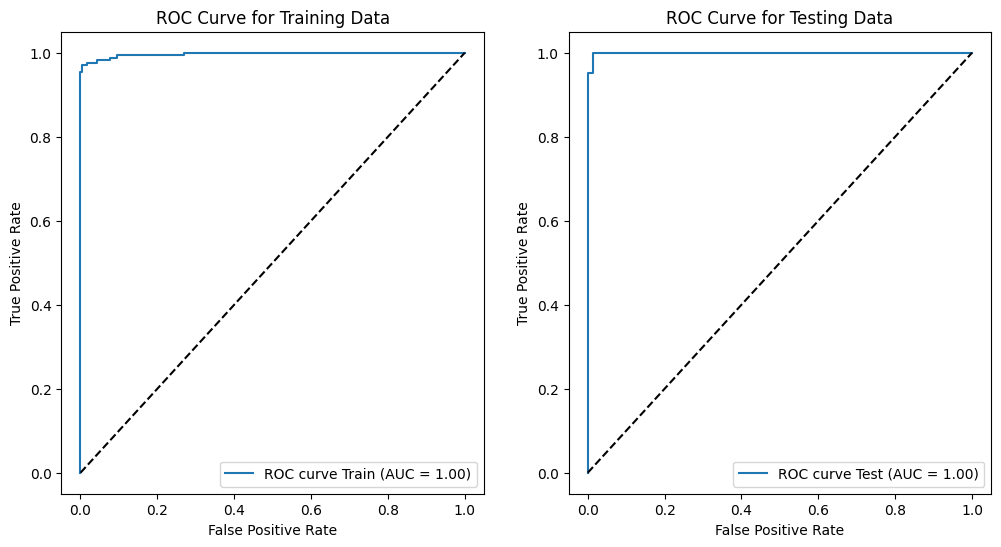

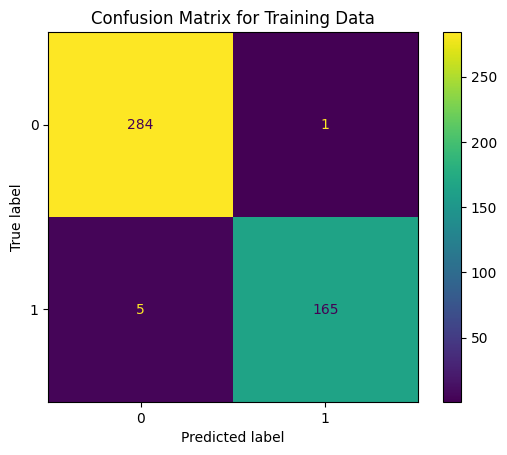

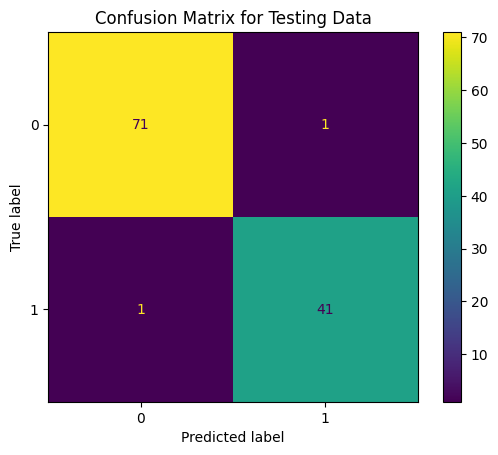

In [9]:
num_simulations = 30
metrics_summary = []

for i in range(num_simulations):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=i)
    
    grid_search = GridSearchCV(model, param_grid, cv=cross_val, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_classifier = grid_search.best_estimator_
    
    y_train_pred = best_classifier.predict(X_train)
    y_test_pred = best_classifier.predict(X_test)
    
    scores_train = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, y_train_pred)
    }
    scores_test = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, y_test_pred)
    }
    metrics_summary.append({'Train': scores_train, 'Test': scores_test})

    print(f"Iteration {i+1}/{num_simulations} ")
    print(f"Train Accuracy: {scores_train['Accuracy']:.3f} | Test Accuracy: {scores_test['Accuracy']:.3f}")

average_metrics = {'Train': {}, 'Test': {}}
for key in scores_train:
    average_metrics['Train'][key] = np.mean([m['Train'][key] for m in metrics_summary])
    average_metrics['Test'][key] = np.mean([m['Test'][key] for m in metrics_summary])

print("-" * 60)
print("Average Metrics Over All Simulations:")
for metric, values in average_metrics.items():
    print(f"{metric} -", values)
print("-" * 60)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_train, grid_search.decision_function(X_train))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve Train (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, grid_search.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve Test (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend(loc='lower right')
plt.show()

cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

#### (ii) Semi-Supervised Learning/ Self-training (A) (B)

Iteration 1/30
Train Accuracy: 0.980 | Test Accuracy: 0.947
Iteration 2/30
Train Accuracy: 0.974 | Test Accuracy: 0.974
Iteration 3/30
Train Accuracy: 0.967 | Test Accuracy: 0.956
Iteration 4/30
Train Accuracy: 0.978 | Test Accuracy: 0.982
Iteration 5/30
Train Accuracy: 0.987 | Test Accuracy: 0.930
Iteration 6/30
Train Accuracy: 0.969 | Test Accuracy: 0.947
Iteration 7/30
Train Accuracy: 0.982 | Test Accuracy: 0.974
Iteration 8/30
Train Accuracy: 0.982 | Test Accuracy: 0.939
Iteration 9/30
Train Accuracy: 0.985 | Test Accuracy: 0.982
Iteration 10/30
Train Accuracy: 0.978 | Test Accuracy: 0.965
Iteration 11/30
Train Accuracy: 0.976 | Test Accuracy: 0.974
Iteration 12/30
Train Accuracy: 0.976 | Test Accuracy: 0.956
Iteration 13/30
Train Accuracy: 0.978 | Test Accuracy: 0.974
Iteration 14/30
Train Accuracy: 0.976 | Test Accuracy: 0.974
Iteration 15/30
Train Accuracy: 0.967 | Test Accuracy: 0.947
Iteration 16/30
Train Accuracy: 0.963 | Test Accuracy: 0.982
Iteration 17/30
Train Accuracy: 0

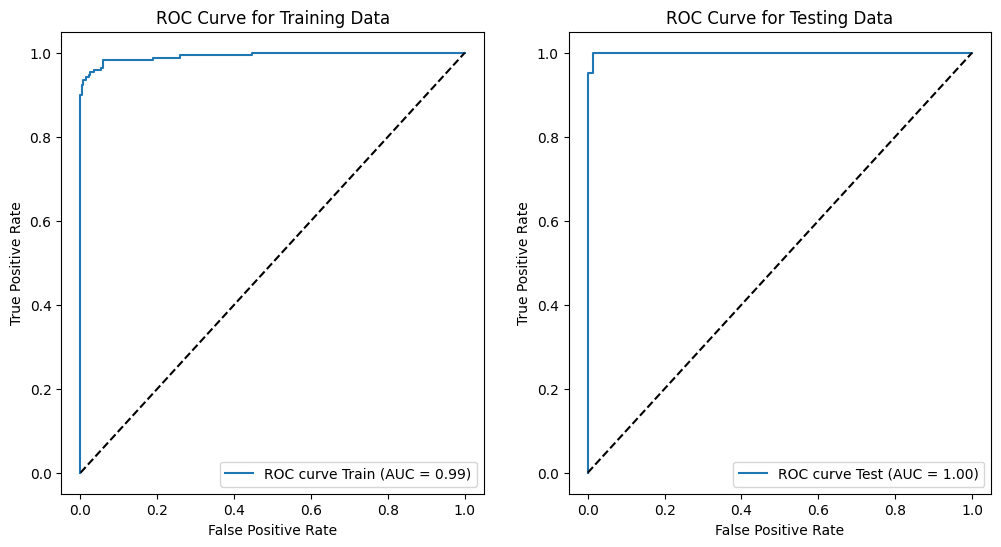

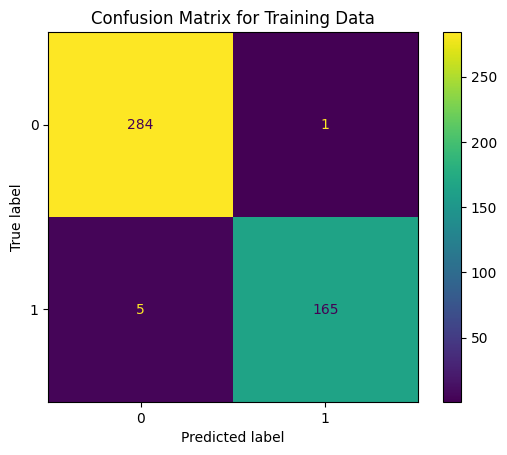

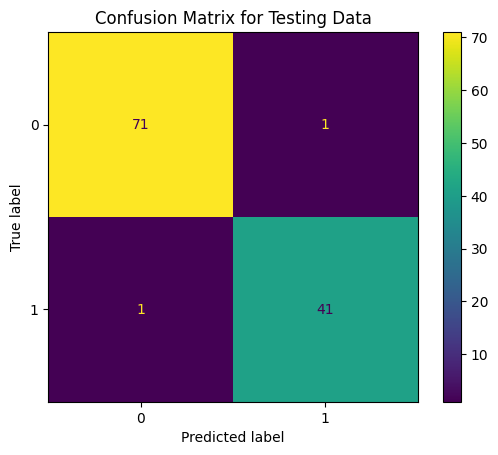

In [10]:
num_runs = 30
test_size = 0.2
random_state = 42
all_metrics = []

for run in range(num_runs):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, stratify=y, random_state=run)
    X_train_df = pd.DataFrame(X_train)
    y_train_df = pd.Series(y_train).reset_index(drop=True)
    
    # Selecting labeled and unlabeled data
    pos_indices = y_train_df[y_train_df == 1].index
    neg_indices = y_train_df[y_train_df == 0].index
    labeled_pos_indices = np.random.choice(pos_indices, size=len(pos_indices)//2, replace=False)
    labeled_neg_indices = np.random.choice(neg_indices, size=len(neg_indices)//2, replace=False)
    labeled_indices = np.concatenate([labeled_pos_indices, labeled_neg_indices])
    
    unlabeled_indices = list(set(y_train_df.index) - set(labeled_indices))
    X_labeled = X_train_df.iloc[labeled_indices].values
    y_labeled = y_train_df.iloc[labeled_indices]
    X_unlabeled = X_train_df.iloc[unlabeled_indices].values
    
    # Model and parameter selection
    model = LinearSVC(penalty='l1', dual=False, max_iter=5000)
    param_grid = {'C': np.logspace(-3, 3, 10)}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_labeled, y_labeled)
    model = grid_search.best_estimator_
    
    # Self-training loop
    while len(X_unlabeled) > 0:
        decision_function = model.decision_function(X_unlabeled)
        farthest_index = np.argmax(np.abs(decision_function))
        X_newly_labeled = X_unlabeled[farthest_index:farthest_index+1]
        y_newly_labeled = model.predict(X_newly_labeled)
        
        # Add newly labeled data to labeled set
        X_labeled = np.vstack([X_labeled, X_newly_labeled])
        y_labeled = np.concatenate([y_labeled, y_newly_labeled])
        
        # Remove from unlabeled set
        X_unlabeled = np.delete(X_unlabeled, farthest_index, axis=0)
        
        # Retrain model
        model.fit(X_labeled, y_labeled)
    
    # Evaluate model
    y_pred_train = model.predict(X_train_df.values)
    y_pred_test = model.predict(X_test)
    scores_train = {
        'Accuracy': accuracy_score(y_train, y_pred_train),
        'Precision': precision_score(y_train, y_pred_train),
        'Recall': recall_score(y_train, y_pred_train),
        'F1 Score': f1_score(y_train, y_pred_train),
        'AUC': roc_auc_score(y_train, y_pred_train)
    }
    scores_test = {
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1 Score': f1_score(y_test, y_pred_test),
        'AUC': roc_auc_score(y_test, y_pred_test)
    }
    all_metrics.append({'Train': scores_train, 'Test': scores_test})
    print(f"Iteration {run+1}/{num_simulations}")
    print(f"Train Accuracy: {scores_train['Accuracy']:.3f} | Test Accuracy: {scores_test['Accuracy']:.3f}")

average_metrics = {'Train': {}, 'Test': {}}
for key in scores_train:
    average_metrics['Train'][key] = np.mean([m['Train'][key] for m in metrics_summary])
    average_metrics['Test'][key] = np.mean([m['Test'][key] for m in metrics_summary])

print("-" * 60)
print("Average Metrics Over All Simulations:")
for metric, values in average_metrics.items():
    print(f"{metric} -", values)
print("-" * 60)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fpr, tpr, _ = roc_curve(y_train, grid_search.decision_function(X_train))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve Train (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, grid_search.decision_function(X_test))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve Test (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend(loc='lower right')
plt.show()

cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title('Confusion Matrix for Training Data')
plt.show()

cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title('Confusion Matrix for Testing Data')
plt.show()

#### (iii) Unsupervised Learning (A) (B) (C)

To make sure that the algorithm was not trapped in local minimum, we set the number of iterations

In [11]:
df = pd.read_csv('../data/wdbc.data', header=None, names=['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)])
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})
X = df.drop(['ID', 'Diagnosis'], axis=1)
y = df['Diagnosis']

# Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Checking dimensions after preprocessing
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)

X_scaled shape: (569, 30)
y shape: (569,)


Train Accuracy: 0.9340659340659341
Test Accuracy: 0.9210526315789473
Train Precision: 0.9666666666666667
Test Precision: 0.9714285714285714
Train Recall: 0.8529411764705882
Test Recall: 0.8095238095238095
Train F1 Score: 0.90625
Test F1 Score: 0.8831168831168831


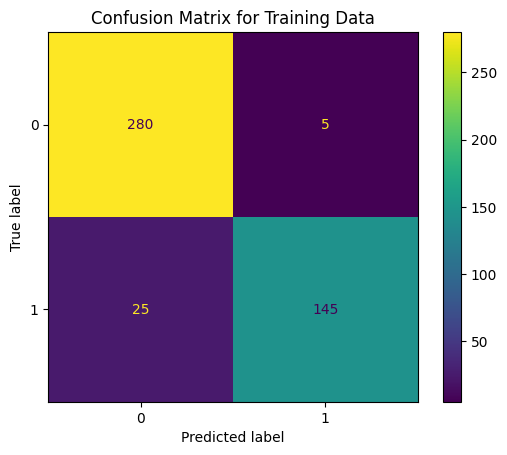

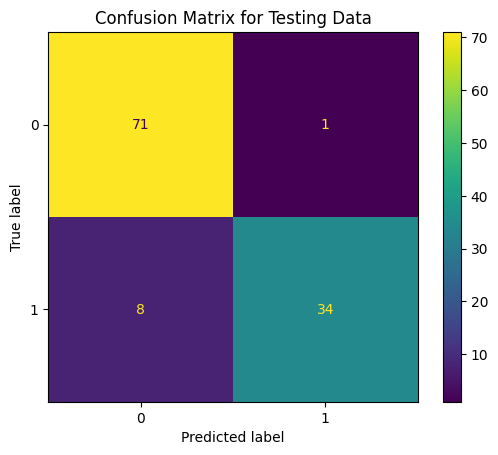

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

y_train_pred = kmeans.predict(X_train)
y_test_pred = kmeans.predict(X_test)

from scipy.stats import mode

labels_train = np.zeros_like(y_train_pred)
labels_test = np.zeros_like(y_test_pred)
for i in range(2):
    mask_train = (y_train_pred == i)
    mask_test = (y_test_pred == i)
    labels_train[mask_train] = mode(y_train[mask_train])[0]
    labels_test[mask_test] = mode(y_test[mask_test])[0]

print("Train Accuracy:", accuracy_score(y_train, labels_train))
print("Test Accuracy:", accuracy_score(y_test, labels_test))
print("Train Precision:", precision_score(y_train, labels_train))
print("Test Precision:", precision_score(y_test, labels_test))
print("Train Recall:", recall_score(y_train, labels_train))
print("Test Recall:", recall_score(y_test, labels_test))
print("Train F1 Score:", f1_score(y_train, labels_train))
print("Test F1 Score:", f1_score(y_test, labels_test))

cm_train = confusion_matrix(y_train, labels_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title("Confusion Matrix for Training Data") 
plt.show()

cm_test = confusion_matrix(y_test, labels_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title("Confusion Matrix for Testing Data") 
plt.show()

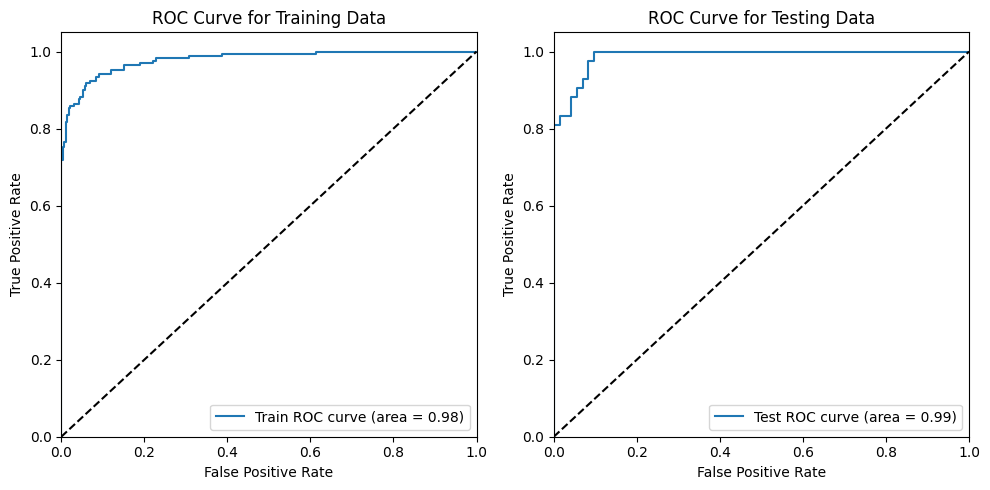

In [13]:
distances_train = kmeans.transform(X_train)
distances_test = kmeans.transform(X_test)

probabilities_train = softmax(-distances_train, axis=1)
probabilities_test = softmax(-distances_test, axis=1)

prob_pos_train = probabilities_train[:, 0]
prob_pos_test = probabilities_test[:, 0]

fpr_train, tpr_train, _ = roc_curve(y_train, prob_pos_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, prob_pos_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### (iv) Spectral Clustering

Train Accuracy: 0.9472527472527472
Test Accuracy: 0.05263157894736842
Train Precision: 0.974025974025974
Test Precision: 0.07692307692307693
Train Recall: 0.8823529411764706
Test Recall: 0.14285714285714285
Train F1 Score: 0.9259259259259259
Test F1 Score: 0.1


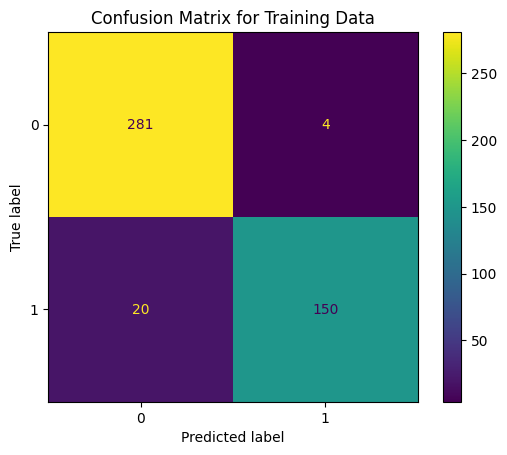

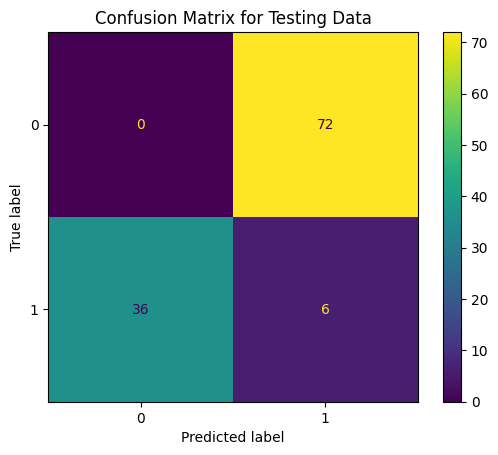

In [14]:
gamma_value = 1 
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, assign_labels='kmeans', random_state=42)
y_train_pred = spectral.fit_predict(X_train)
y_test_pred = spectral.fit_predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Train Precision:", precision_score(y_train, y_train_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Train Recall:", recall_score(y_train, y_train_pred))
print("Test Recall:", recall_score(y_test, y_test_pred))
print("Train F1 Score:", f1_score(y_train, y_train_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))

cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title("Confusion Matrix for Training Data")
plt.show()

cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title("Confusion Matrix for Testing Data")
plt.show()

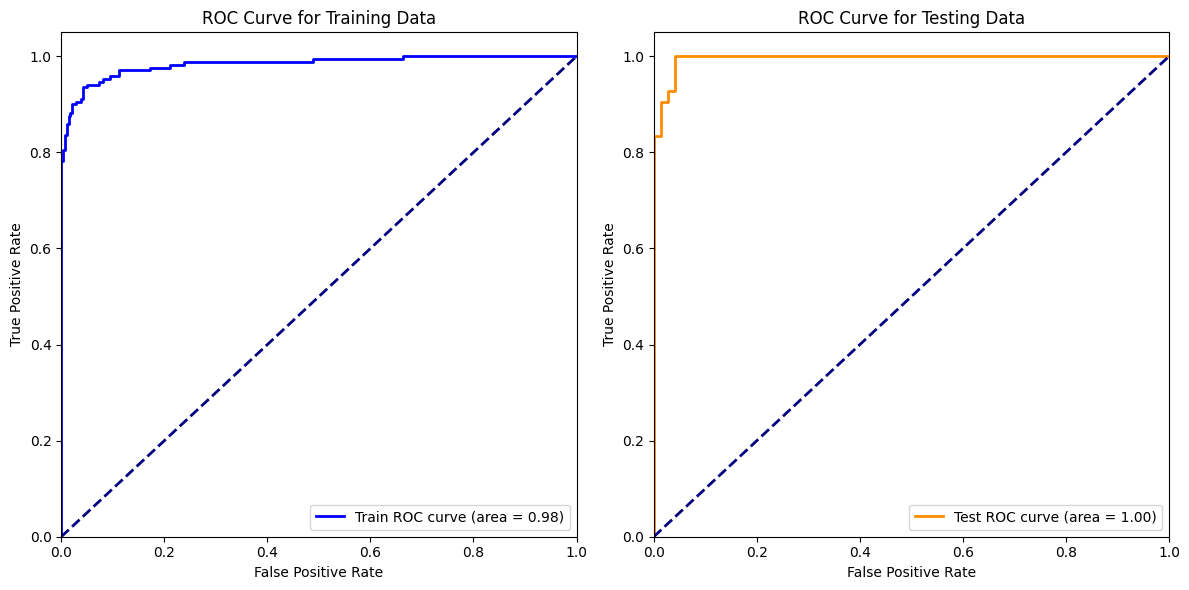

In [15]:
from sklearn.linear_model import LogisticRegression

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, assign_labels='kmeans', random_state=42)
y_train_pred = spectral.fit_predict(X_train)
y_test_pred = spectral.fit_predict(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_pred)

probabilities_train = log_reg.predict_proba(X_train)[:, 1]
probabilities_test = log_reg.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, probabilities_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, probabilities_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### (v) Compare

The summary above indicates that Supervised learning outperforms Semi-Supervised learning, which in turn surpasses Unsupervised learning in effectiveness. The disparity is more noticeable between Semi-Supervised and Unsupervised learning than between Supervised and Semi-Supervised. This trend is anticipated because Supervised learning benefits from having access to more label information to guide its predictions, while Semi-Supervised learning has less. Unsupervised learning, relying solely on feature similarities for making predictions, does not achieve the performance levels of the other two methods.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [16]:
banknote_data_path = "../data/data_banknote_authentication.txt"
banknote_data = pd.read_csv(banknote_data_path, header=None)
banknote_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
print(banknote_data)
print(banknote_data['class'].value_counts())
X = banknote_data.drop('class', axis=1)
y = banknote_data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472/(900+472), random_state=42)

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]
class
0    762
1    610
Name: count, dtype: int64


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
def passive_learning(X_train, y_train, X_test, y_test, iterations=50):
    training_sizes = range(10, 901, 10)
    test_accuracies = np.zeros((iterations, len(training_sizes)))

    for i in range(iterations):
        for j, size in enumerate(training_sizes):
            indices = np.random.choice(X_train.shape[0], size, replace=False)
            X_train_subset = X_train.iloc[indices]
            y_train_subset = y_train.iloc[indices]

            model = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', dual=False, random_state=42))
            model.fit(X_train_subset, y_train_subset)

            test_accuracy = model.score(X_test, y_test)
            test_accuracies[i, j] = test_accuracy

        print(f"Iteration {i + 1} completed.")

    avg_test_accuracies = test_accuracies.mean(axis=0)
    return training_sizes, avg_test_accuracies


In [19]:
training_sizes_passive, avg_accuracies_passive = passive_learning(X_train, y_train, X_test, y_test)

Iteration 1 completed.
Iteration 2 completed.
Iteration 3 completed.
Iteration 4 completed.
Iteration 5 completed.
Iteration 6 completed.
Iteration 7 completed.
Iteration 8 completed.
Iteration 9 completed.
Iteration 10 completed.
Iteration 11 completed.
Iteration 12 completed.
Iteration 13 completed.
Iteration 14 completed.
Iteration 15 completed.
Iteration 16 completed.
Iteration 17 completed.
Iteration 18 completed.
Iteration 19 completed.
Iteration 20 completed.
Iteration 21 completed.
Iteration 22 completed.
Iteration 23 completed.
Iteration 24 completed.
Iteration 25 completed.
Iteration 26 completed.
Iteration 27 completed.
Iteration 28 completed.
Iteration 29 completed.
Iteration 30 completed.
Iteration 31 completed.
Iteration 32 completed.
Iteration 33 completed.
Iteration 34 completed.
Iteration 35 completed.
Iteration 36 completed.
Iteration 37 completed.
Iteration 38 completed.
Iteration 39 completed.
Iteration 40 completed.
Iteration 41 completed.
Iteration 42 completed.
I

#### (ii) Active

In [20]:
def active_learning(X_train, y_train, X_test, y_test, iterations=50):
    training_sizes = list(range(10, 901, 10)) 
    all_accuracies = np.zeros((iterations, len(training_sizes))) 

    for i in range(iterations):
        initial_indices = np.random.choice(X_train.shape[0], 10, replace=False)
        training_indices = list(initial_indices)
        used_indices = set(initial_indices)

        current_size_index = 0

        while len(training_indices) <= 900:
            if len(training_indices) >= training_sizes[current_size_index]:
                X_train_subset = X_train.iloc[training_indices]
                y_train_subset = y_train.iloc[training_indices]

                model = make_pipeline(StandardScaler(), LinearSVC(penalty='l1', dual=False, random_state=42, max_iter=5000))
                model.fit(X_train_subset, y_train_subset)

                y_pred = model.predict(X_test)
                test_accuracy = accuracy_score(y_test, y_pred)
                all_accuracies[i, current_size_index] = test_accuracy
                current_size_index += 1
                if current_size_index >= len(training_sizes):
                    break

            distances = model.decision_function(X_train)
            sorted_indices = np.argsort(np.abs(distances))
            new_indices = [idx for idx in sorted_indices if idx not in used_indices][:10]
            training_indices.extend(new_indices)
            used_indices.update(new_indices)

        print(f"Iteration {i + 1} completed.")

    avg_test_accuracies = all_accuracies.mean(axis=0)
    return training_sizes, avg_test_accuracies


In [21]:
training_sizes_active, avg_accuracies_active = active_learning(X_train, y_train, X_test, y_test)

Iteration 1 completed.
Iteration 2 completed.
Iteration 3 completed.
Iteration 4 completed.
Iteration 5 completed.
Iteration 6 completed.
Iteration 7 completed.
Iteration 8 completed.
Iteration 9 completed.
Iteration 10 completed.
Iteration 11 completed.
Iteration 12 completed.
Iteration 13 completed.
Iteration 14 completed.
Iteration 15 completed.
Iteration 16 completed.
Iteration 17 completed.
Iteration 18 completed.
Iteration 19 completed.
Iteration 20 completed.
Iteration 21 completed.
Iteration 22 completed.
Iteration 23 completed.
Iteration 24 completed.
Iteration 25 completed.
Iteration 26 completed.
Iteration 27 completed.
Iteration 28 completed.
Iteration 29 completed.
Iteration 30 completed.
Iteration 31 completed.
Iteration 32 completed.
Iteration 33 completed.
Iteration 34 completed.
Iteration 35 completed.
Iteration 36 completed.
Iteration 37 completed.
Iteration 38 completed.
Iteration 39 completed.
Iteration 40 completed.
Iteration 41 completed.
Iteration 42 completed.
I

### (c) Average the 50 test errors

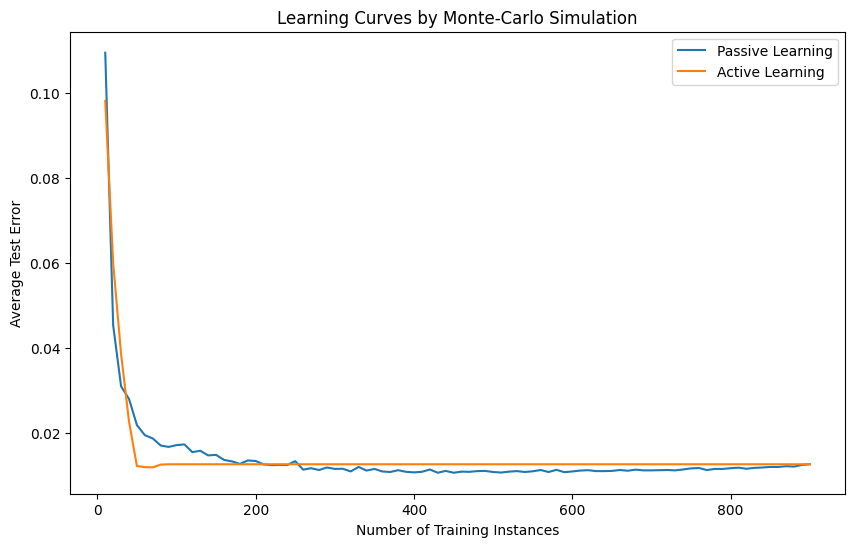

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(training_sizes_passive, 1 - avg_accuracies_passive, label='Passive Learning')
plt.plot(training_sizes_active, 1 - avg_accuracies_active, label='Active Learning')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.title('Learning Curves by Monte-Carlo Simulation')
plt.legend()
plt.show()